# 소비자 데이터 기반 소비 예측 경진대회
https://www.dacon.io/competitions/official/235893

## Features
- `id`: 샘플 아이디
- `Year_Birth`: 고객 생년월일
- `Education`: 고객 학력
- `Marital_status`: 고객 결혼 상태
- `Income`: 고객 연간 가구 소득
- `Kidhome`: 고객 가구의 자녀 수
- `Teenhome`: 고객 가구의 청소년 수
- `Dt_Customer`: 고객이 회사에 등록한 날짜
- `Recency`: 고객의 마지막 구매 이후 일수
- `NumDealsPurchases`: 할인된 구매 횟수
- `NumWebPurchases`: 회사 웹사이트를 통한 구매 건수
- `NumCatalogPurchases`: 카탈로그를 사용한 구매 수 
- `NumStorePuchases`: 매장에서 직접 구매한 횟수
- `NumWebVisitsMonth`: 지난 달 회사 웹사이트 방문 횟수
- `AcceptedCmp`: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `AcceptedCmp`: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `AcceptedCmp`: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `AcceptedCmp`: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `AcceptedCmp`: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `Complain`: 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- `Response`: 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- `target`: 고객의 제품 총 소비량

In [1]:
import os
root_dir = '../../' if os.getcwd().split('/')[-1] != 'customer' else './'
os.chdir(root_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import font_family
font_family.set_font_family()

In [2]:
train = pd.read_csv('original_data/train.csv')
test = pd.read_csv('original_data/test.csv')
print(train.shape, test.shape)
print(train.columns.tolist())
train.head()

(1108, 22) (1108, 21)
['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target']


,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [3]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

### Dt_Customer
EDA에 앞서 문자열 형태의 날짜 데이터를 구분하여 각각을 정수형 데이터로 변환합니다.

In [5]:
train['Dt_Customer'] = train['Dt_Customer'].apply(lambda x: x.split('-'))
train['Year_Customer'] = train['Dt_Customer'].apply(lambda x: int(x[2]))
train['Month_Customer'] = train['Dt_Customer'].apply(lambda x: int(x[1]))
train['Day_Customer'] = train['Dt_Customer'].apply(lambda x: int(x[0]))
train.drop(['Dt_Customer'], axis=1, inplace=True)
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Year_Customer,Month_Customer,Day_Customer
0,0,1974,Master,Together,46014.0,1,1,21,10,7,...,0,0,0,0,0,0,541,2013,1,21
1,1,1962,Graduation,Single,76624.0,0,1,68,1,5,...,0,0,0,0,0,0,899,2014,5,24
2,2,1951,Graduation,Married,75903.0,0,1,50,2,6,...,0,0,0,0,0,0,901,2013,4,8
3,3,1974,Basic,Married,18393.0,1,0,2,2,3,...,0,0,0,0,0,0,50,2014,3,29
4,4,1946,PhD,Together,64014.0,2,1,56,7,8,...,0,0,1,0,0,0,444,2014,6,10


## EDA
모든 데이터에 결측치가 없다는 것을 전제로 EDA를 진행합니다.

## target

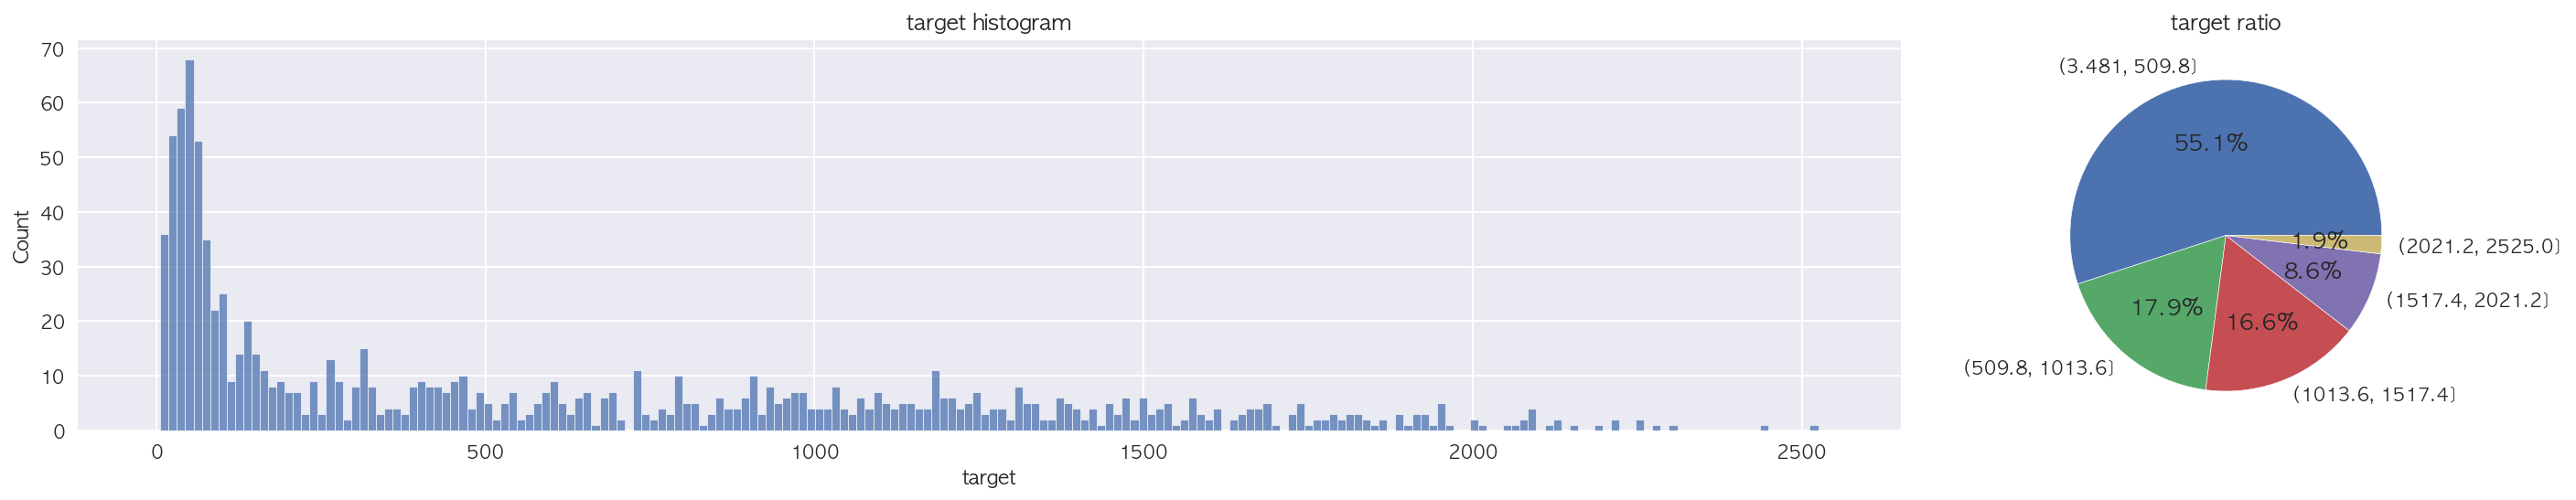

In [66]:
column = 'target'

fig, ax = plt.subplots(1, 2, figsize=(20,4), gridspec_kw={'width_ratios':[12,3]})

sns.histplot(ax=ax[0], data=train, x=column, bins=200)
ax[0].set(title=f'{column} histogram')

cutted_counts = pd.cut(train[column],bins=5).value_counts()
ax[1].pie(cutted_counts, labels=cutted_counts.index, autopct='%.1f%%')
ax[1].set(title=f'{column} ratio')

plt.tight_layout()
plt.show()

'target'은 6 부터 2525 사이의 범위에 존재합니다.   
전체 데이터 중 50퍼센트 이상이 500 이하의 값에 위치하며, 그 중 100 이하의 값에 분포가 집중됨을 확인할 수 있습니다.

### Numerical Features

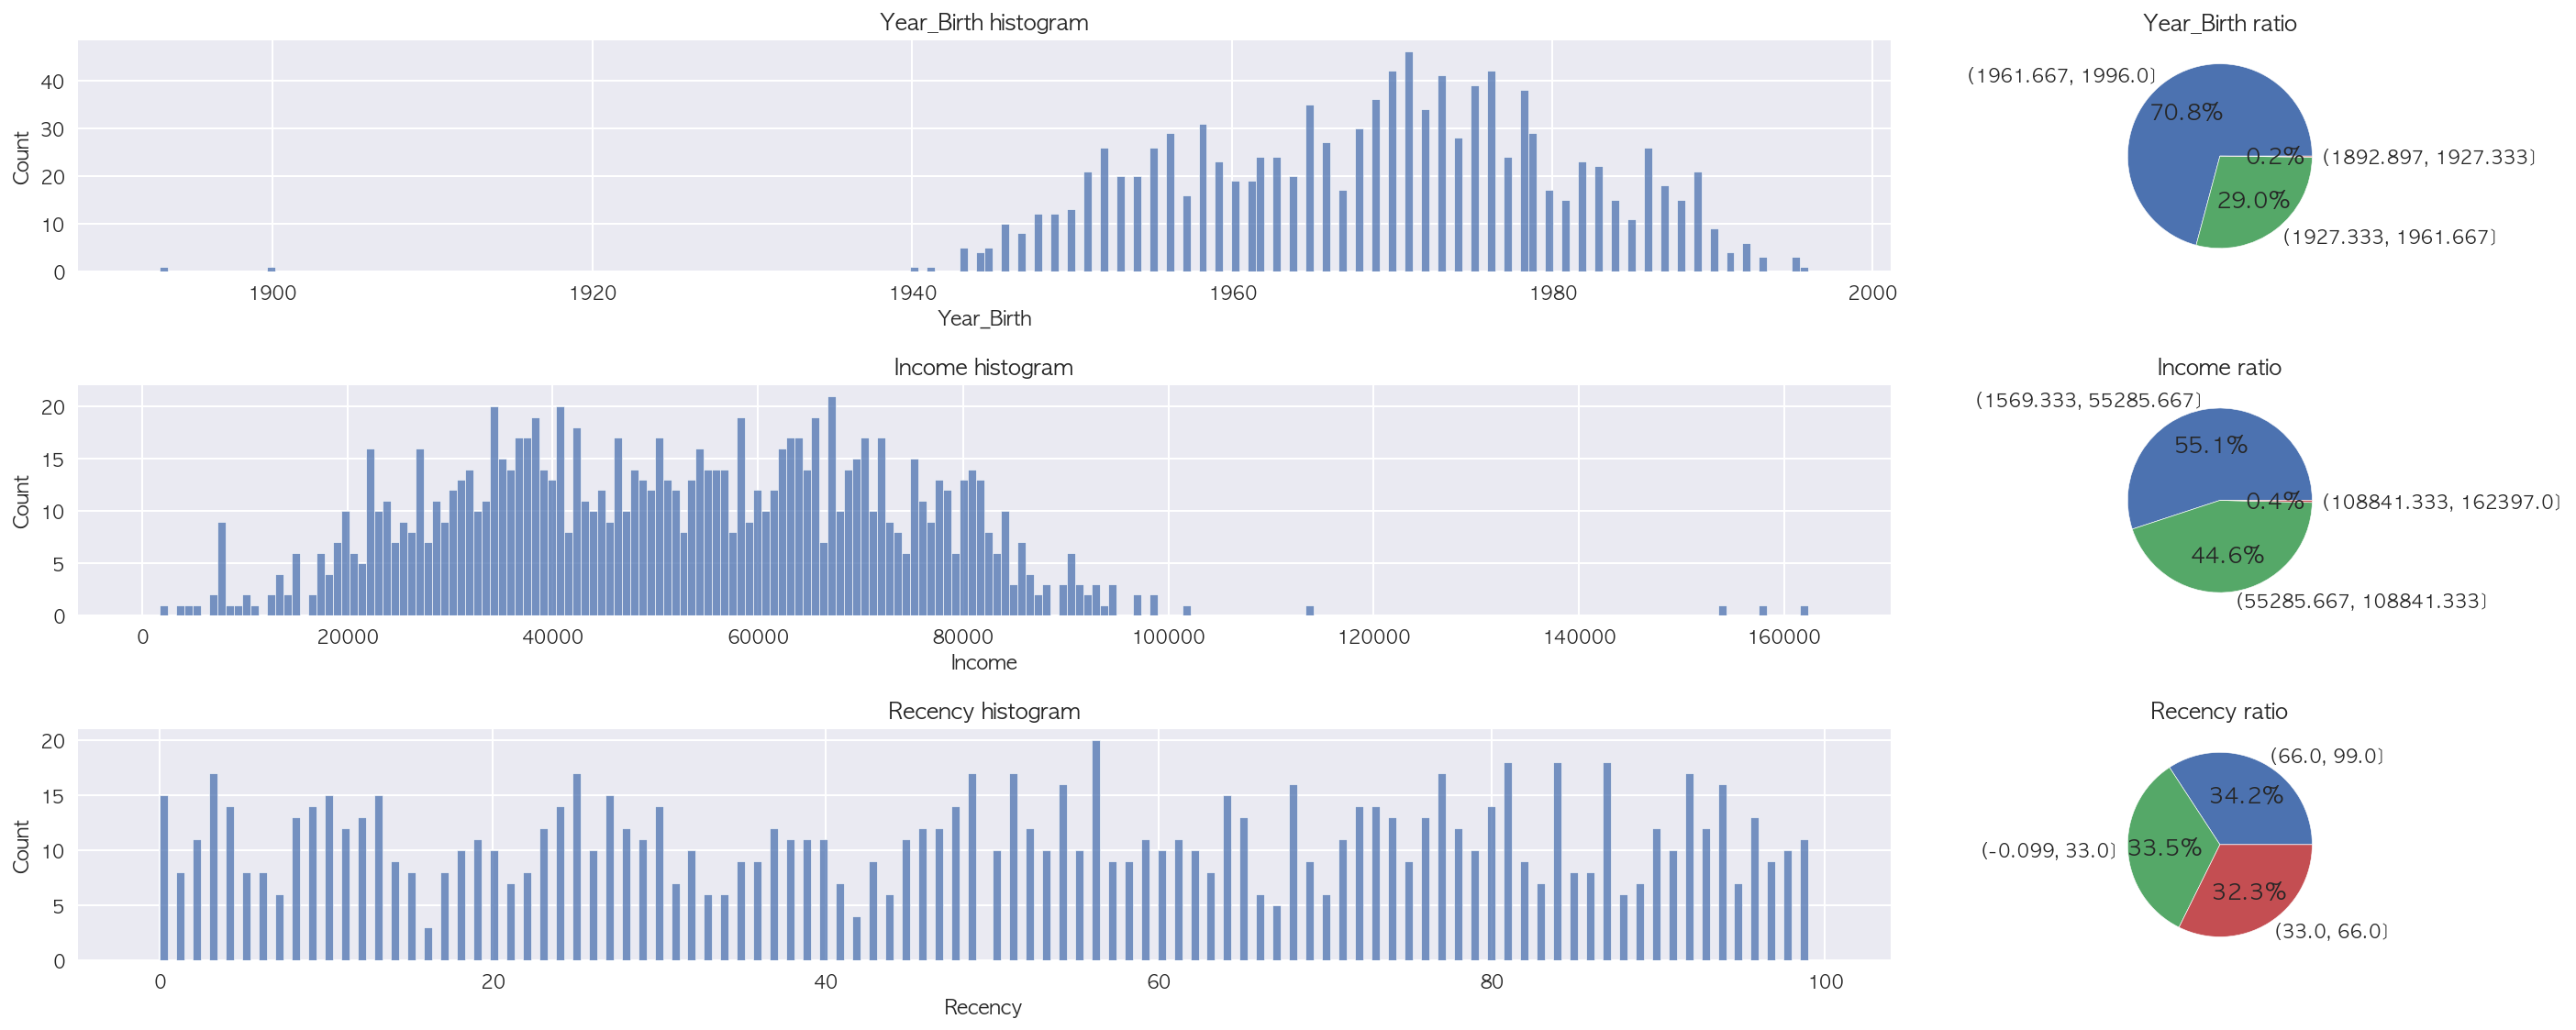

In [95]:
columns = ['Year_Birth','Income','Recency']

fig, ax = plt.subplots(3, 2, figsize=(20,8), gridspec_kw={'width_ratios':[12,3]})
for i, column in enumerate(columns):
    sns.histplot(ax=ax[i][0], data=train, x=column, bins=200)
    ax[i][0].set(title=f'{column} histogram')

    cutted_counts = pd.cut(train[column],bins=3).value_counts()
    ax[i][1].pie(cutted_counts, labels=cutted_counts.index, autopct='%.1f%%')
    ax[i][1].set(title=f'{column} ratio')

plt.tight_layout()
plt.show()

'Year_Birth' 데이터의 경우 1800년대부터 2000년 이전까지의 범위에 존재합니다.   
1940년 이전의 구간에서 이상치가 발생하는 것으로 보여집니다.

'Income' 데이터의 경우 대략적으로 0부터 160000 사이의 범위에 존재합니다.   
'Income' 데이터도 마찬가지로 100000 이후의 구간에서 이상치가 발생하는 것으로 판단합니다.

'Recency'는 전체적으로 고루 분포해있어 추가적인 작업이 필요 없어 보입니다.

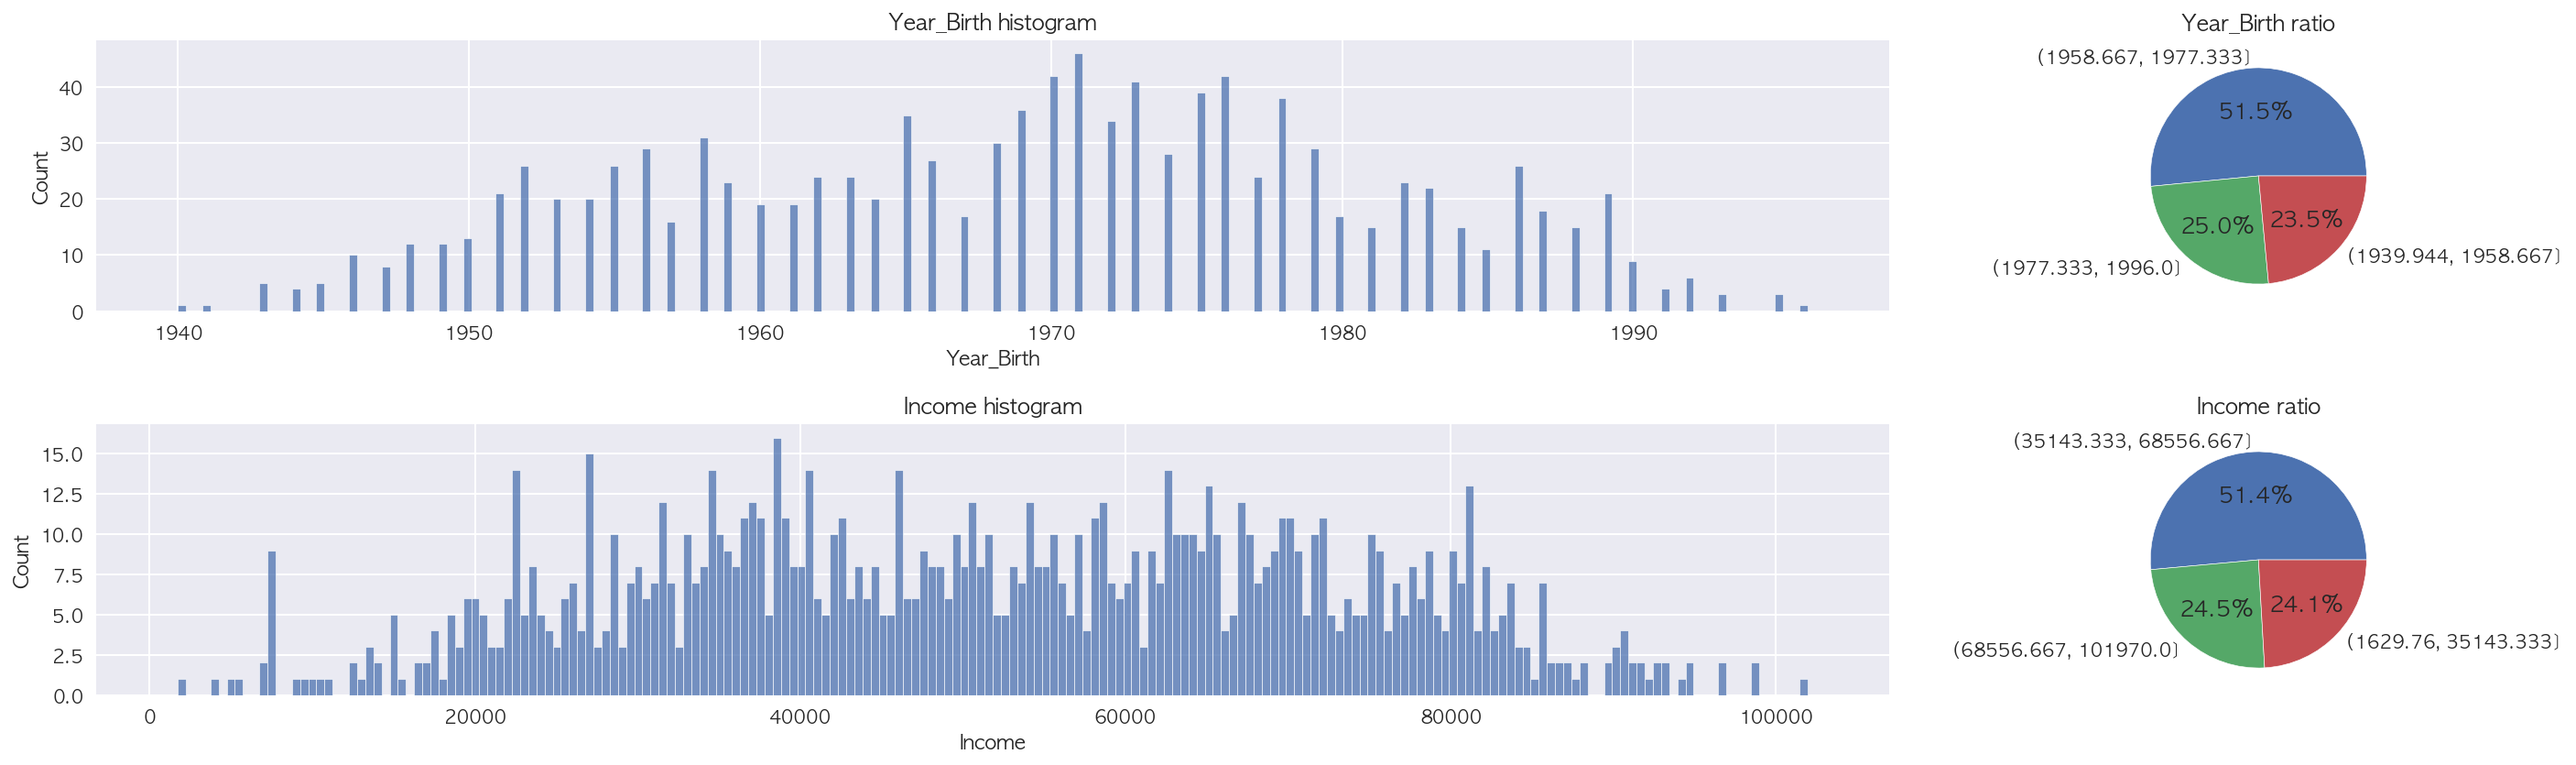

In [106]:
columns = ['Year_Birth','Income']

fig, ax = plt.subplots(2, 2, figsize=(20,6), gridspec_kw={'width_ratios':[12,3]})
for (i, column), outlier in zip(enumerate(columns),[0,2]):
    cutted_data = pd.cut(train[column],bins=3,labels=[0,1,2])
    cutted_train = train[cutted_data != outlier]
    sns.histplot(ax=ax[i][0], data=cutted_train, x=column, bins=200)
    ax[i][0].set(title=f'{column} histogram')

    cutted_counts = pd.cut(cutted_train[column],bins=3).value_counts()
    ax[i][1].pie(cutted_counts, labels=cutted_counts.index, autopct='%.1f%%')
    ax[i][1].set(title=f'{column} ratio')

plt.tight_layout()
plt.show()

두 데이터의 이상치라고 여겨지는 범위를 제거하면 정상적인 분포를 확인할 수 있습니다.

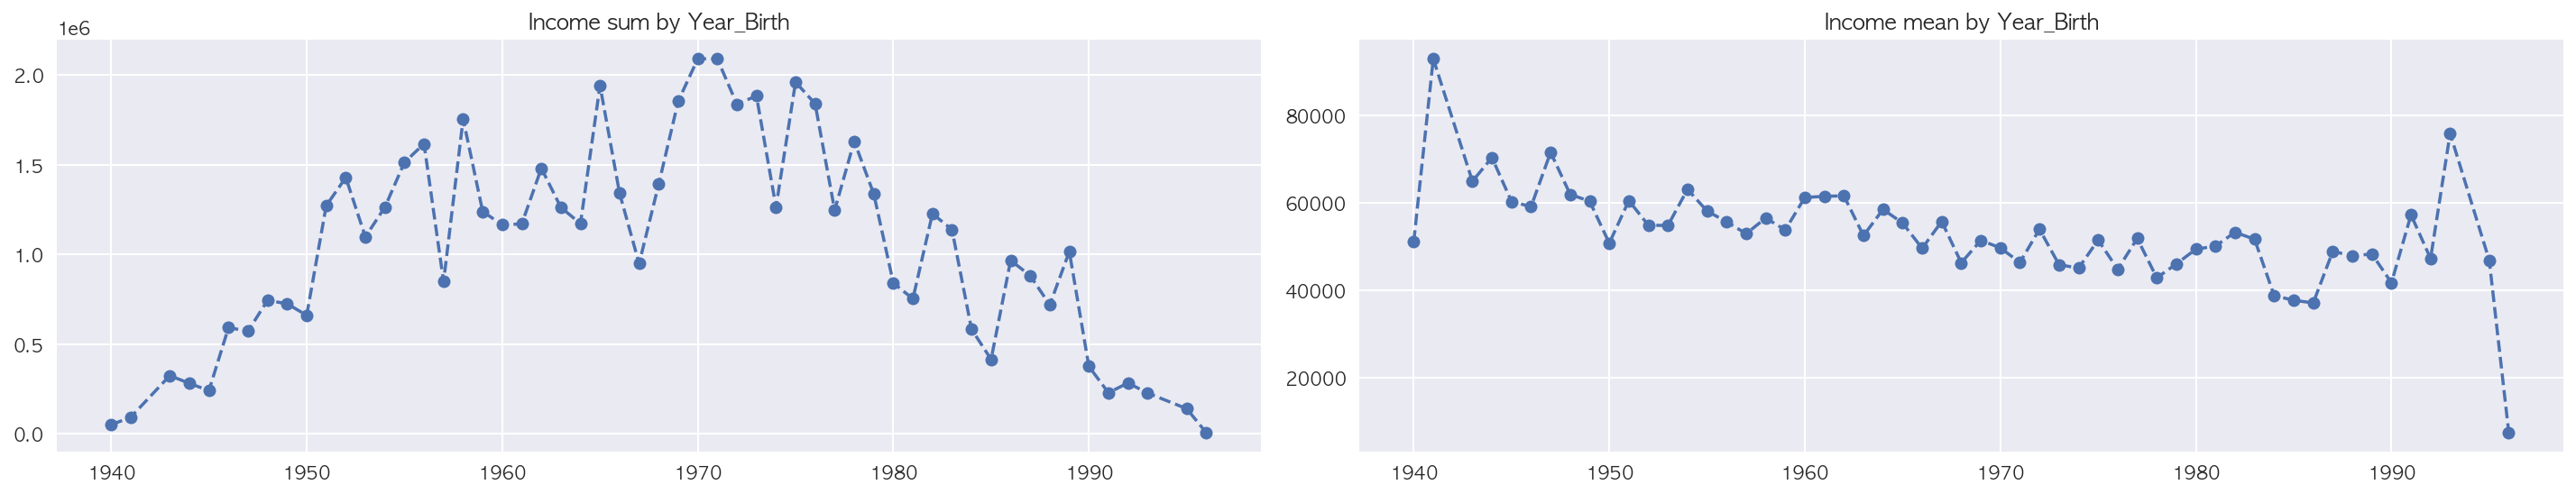

In [169]:
columns = ['Year_Birth','Income']

cutted_birth = pd.cut(train[columns[0]],bins=3,labels=[0,1,2]) != 0
cutted_income = pd.cut(train[columns[1]],bins=3,labels=[0,1,2]) != 2
cutted_train = train[cutted_birth & cutted_income]
sum_birth = cutted_train[columns].groupby(columns[0]).sum()
mean_birth = cutted_train[columns].groupby(columns[0]).mean()

fig, ax = plt.subplots(1, 2, figsize=(20,4))
ax[0].plot(sum_birth.index,sum_birth[columns[1]],'o--')
ax[0].set(title=f'{columns[1]} sum by {columns[0]}')
ax[1].plot(mean_birth.index,mean_birth[columns[1]],'o--')
ax[1].set(title=f'{columns[1]} mean by {columns[0]}')

plt.tight_layout()
plt.show()

[코드 공유](https://dacon.io/competitions/official/235893/codeshare/4885)를 참고해서 'Year_Birth'와 'Income' 간에 상관관계를 파악했습니다.   
해당 결과를 통해 전처리 과정에서 두 변수를 조합한 파생 변수를 생성해보면 의미있을 것이라 판단했습니다.

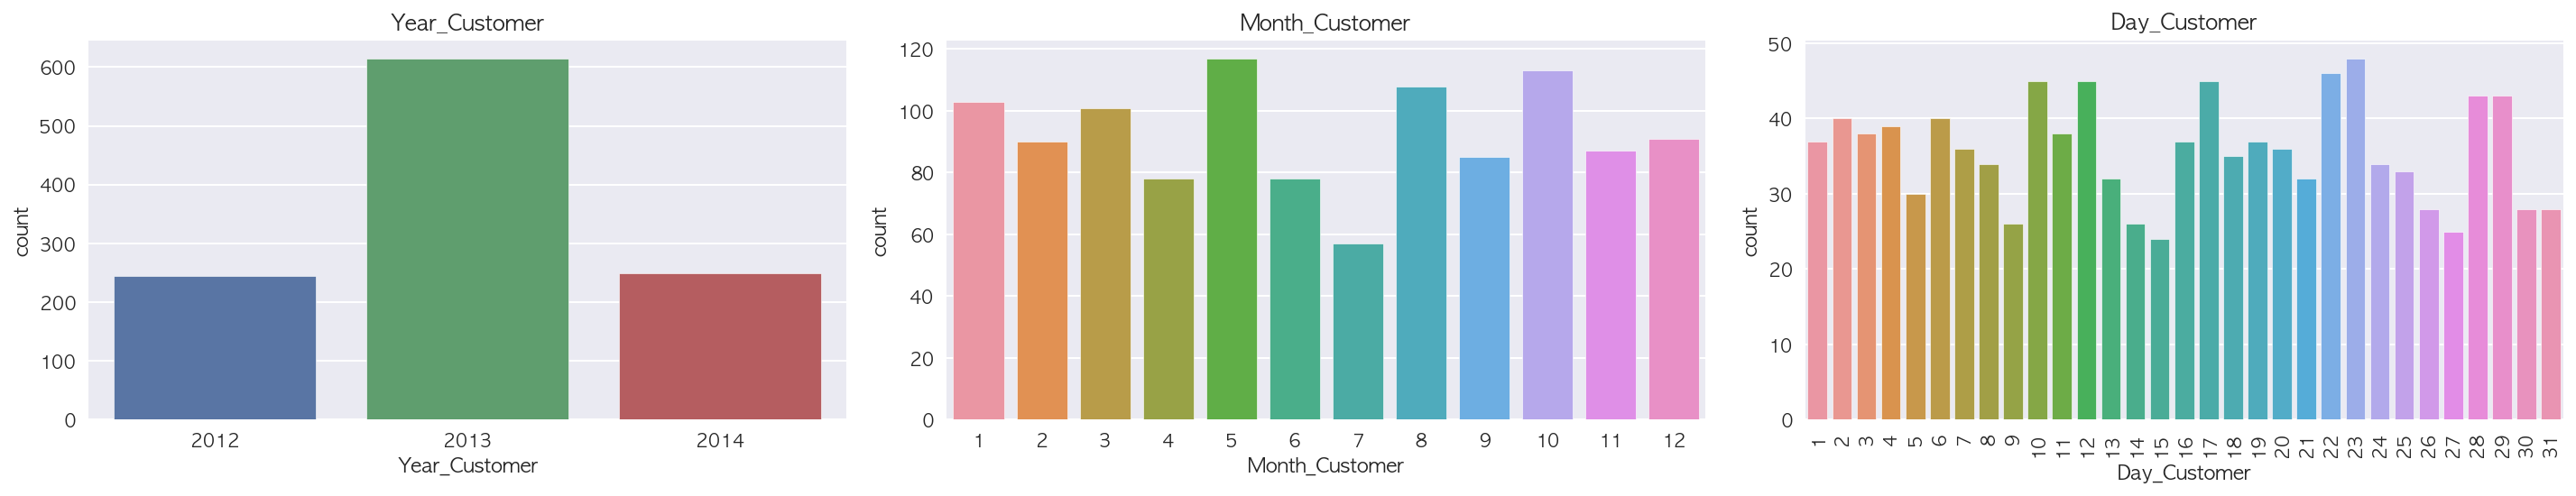

In [86]:
columns = ['Year_Customer','Month_Customer','Day_Customer']

fig, ax = plt.subplots(1, 3, figsize=(20,4))
for i, column in enumerate(columns):
    sns.countplot(ax=ax[i], data=train, x=column)
    ax[i].set(title=column)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

'Dt_Customer'를 분리한 'Year_Customer', 'Month_Customer', 'Day_Customer'에 대해 확인해보았습니다.

'Year_Customer'는 2012, 2013, 2014의 세 가지 범주에 들어있습니다.   
해당 데이터를 숫자형 데이터로 판단할지 범주형 데이터로 판단할지는 모델 구현 과정에서 알아봐야 할 것입니다.

'Year_Customer는 2013년의 비중이 크고,   
'Month_Customer'와 'Day_Customer'는 전체적으로 비슷하게 분포되어 있습니다.

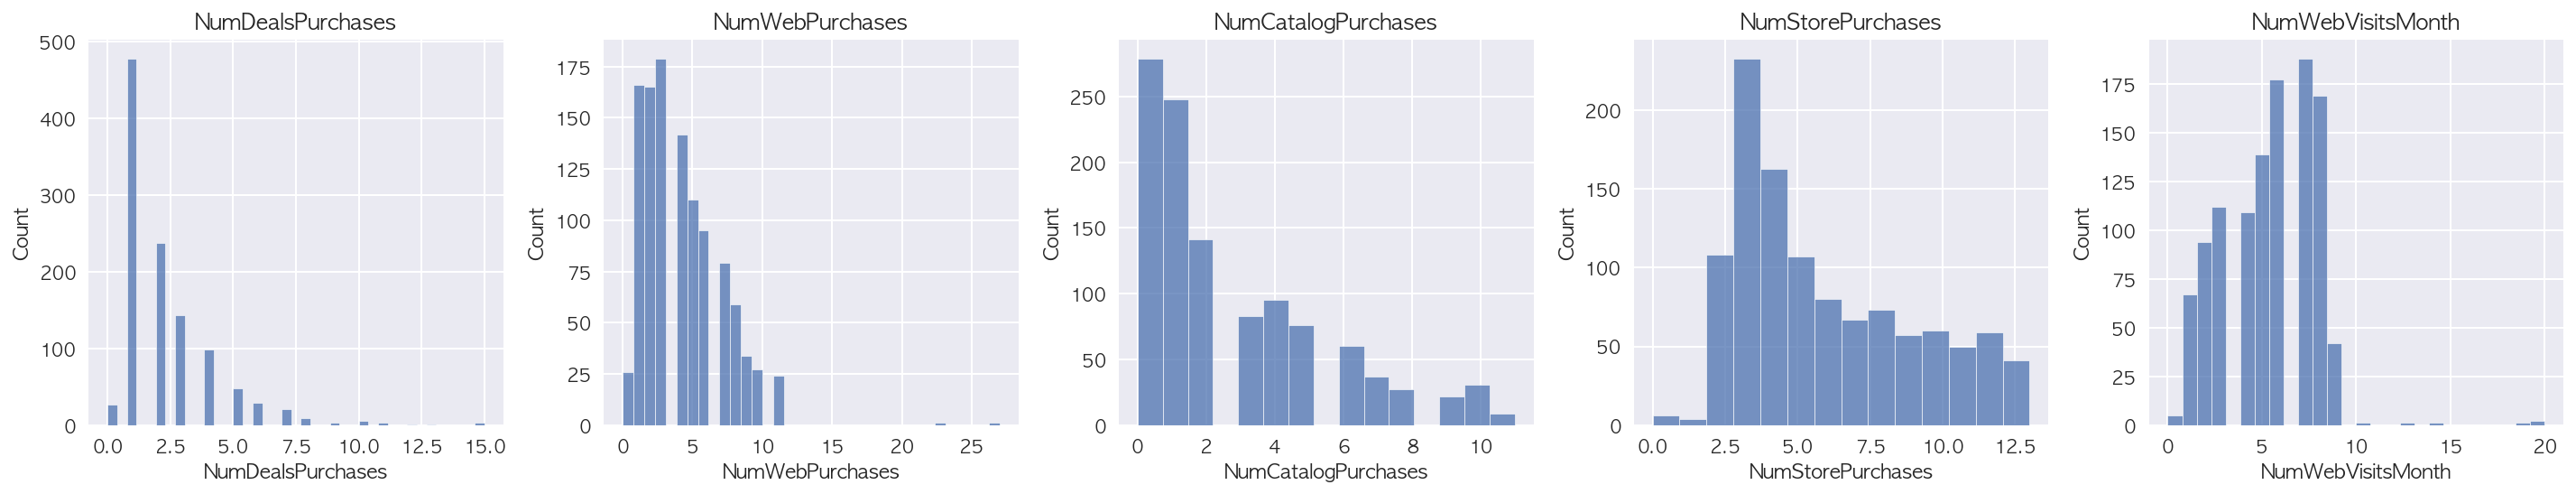

In [85]:
columns = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

fig, ax = plt.subplots(1, 5, figsize=(20,4))
for i, column in enumerate(columns):
    sns.histplot(ax=ax[i], data=train, x=column)
    ax[i].set(title=column)

plt.tight_layout()
plt.show()

'NumPurchases' 열의 경우 'NumDealsPurchases'와 'NumWebPurchases'에서 이상치가 있을 것이라 판단됩니다.

'NumWebVisitsMonth' 역시 이상치가 확인됩니다.

### Categorical Features

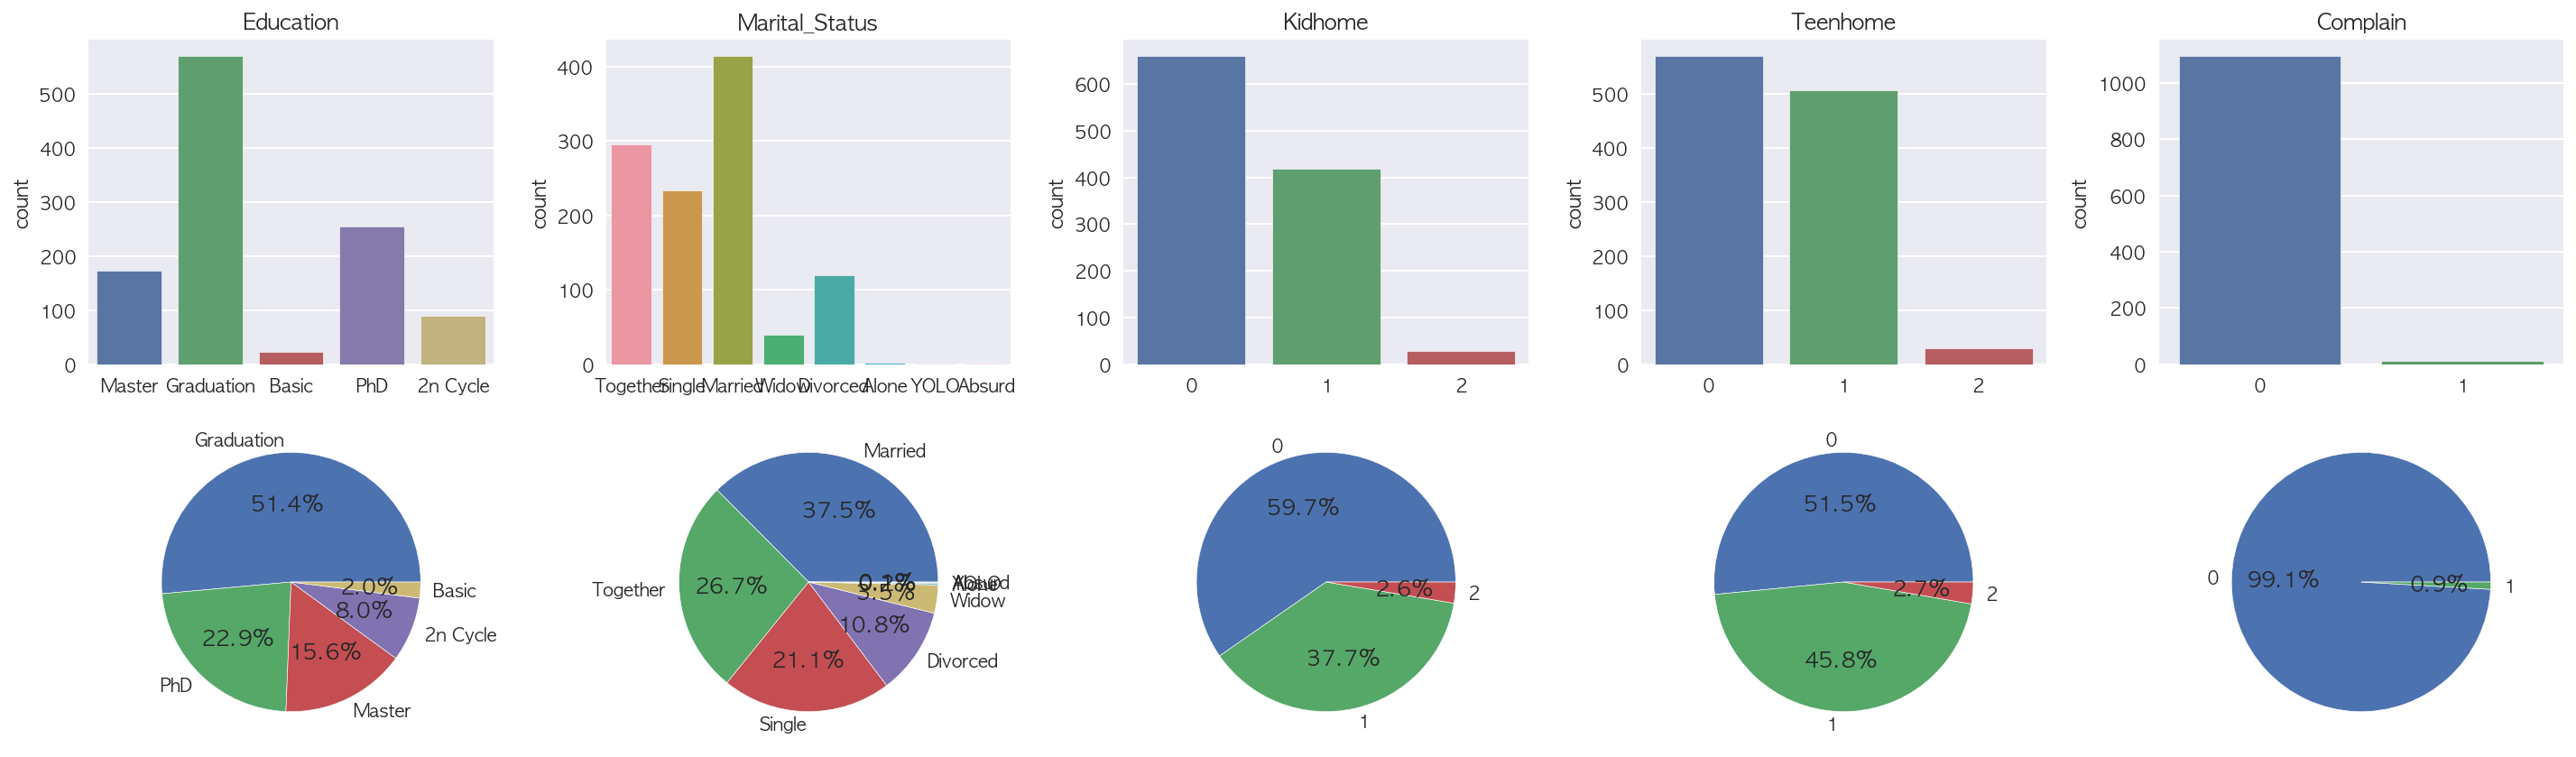

In [175]:
columns = ['Education','Marital_Status','Kidhome','Teenhome','Complain']

fig, ax = plt.subplots(2, 5, figsize=(20,6))
for i, column in enumerate(columns):
    sns.countplot(ax=ax[0][i], data=train, x=column)
    ax[0][i].set(title=f'{column}', xlabel=None)

    value_counts = train[column].value_counts()
    ax[1][i].pie(value_counts, labels=value_counts.index, autopct='%.1f%%')

plt.tight_layout()
plt.show()

'Marital_Status'에서 'Alone', 'YOLO', 'Absurd' 데이터가 극히 작아 하나의 'Single' 범주로 묶어서 분석할 수 있어보입니다.

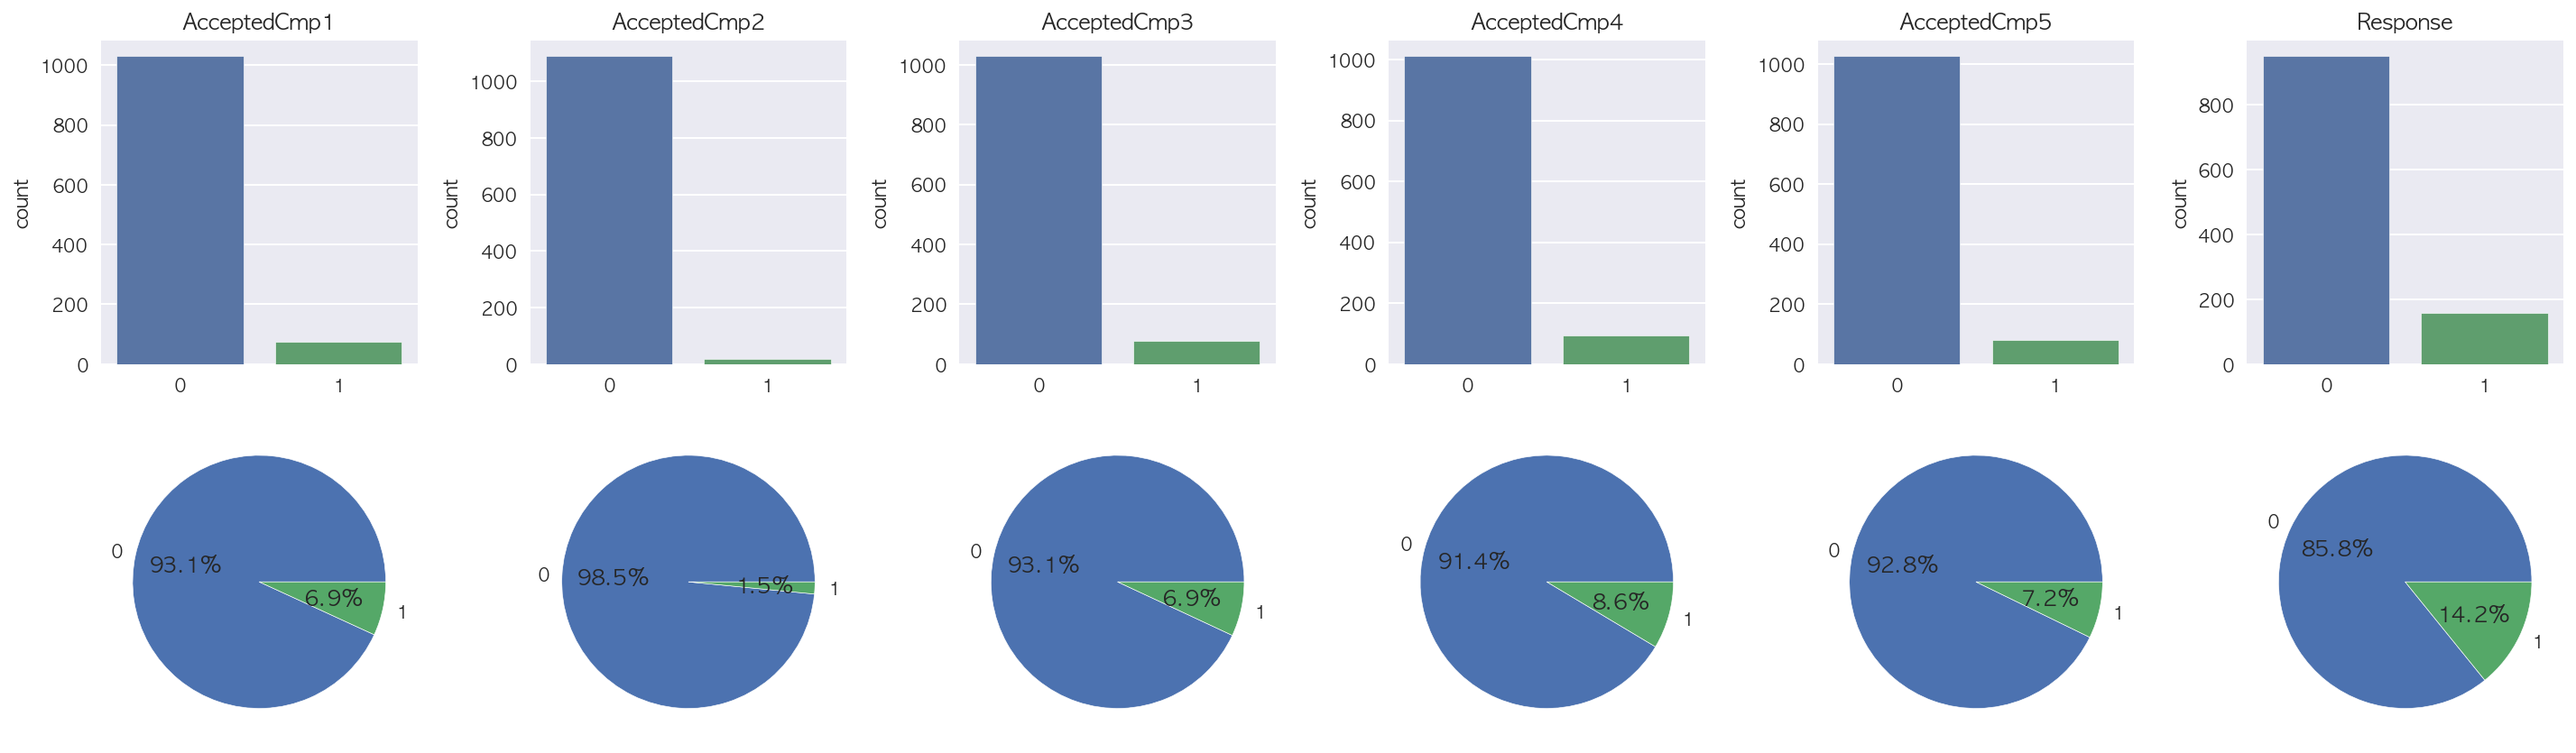

In [170]:
columns = [f'AcceptedCmp{i}' for i in range(1,6)]+['Response']

fig, ax = plt.subplots(2, 6, figsize=(20,6))
for i, column in enumerate(columns):
    sns.countplot(ax=ax[0][i], data=train, x=column)
    ax[0][i].set(title=f'{column}', xlabel=None)

    value_counts = train[column].value_counts()
    ax[1][i].pie(value_counts, labels=value_counts.index, autopct='%.1f%%')

plt.tight_layout()
plt.show()

### Outliers
앞서 이상치가 있을 것이라 여겨졌던 열에 대해 IQR을 이용하여 상한/하한을 구해보았습니다.

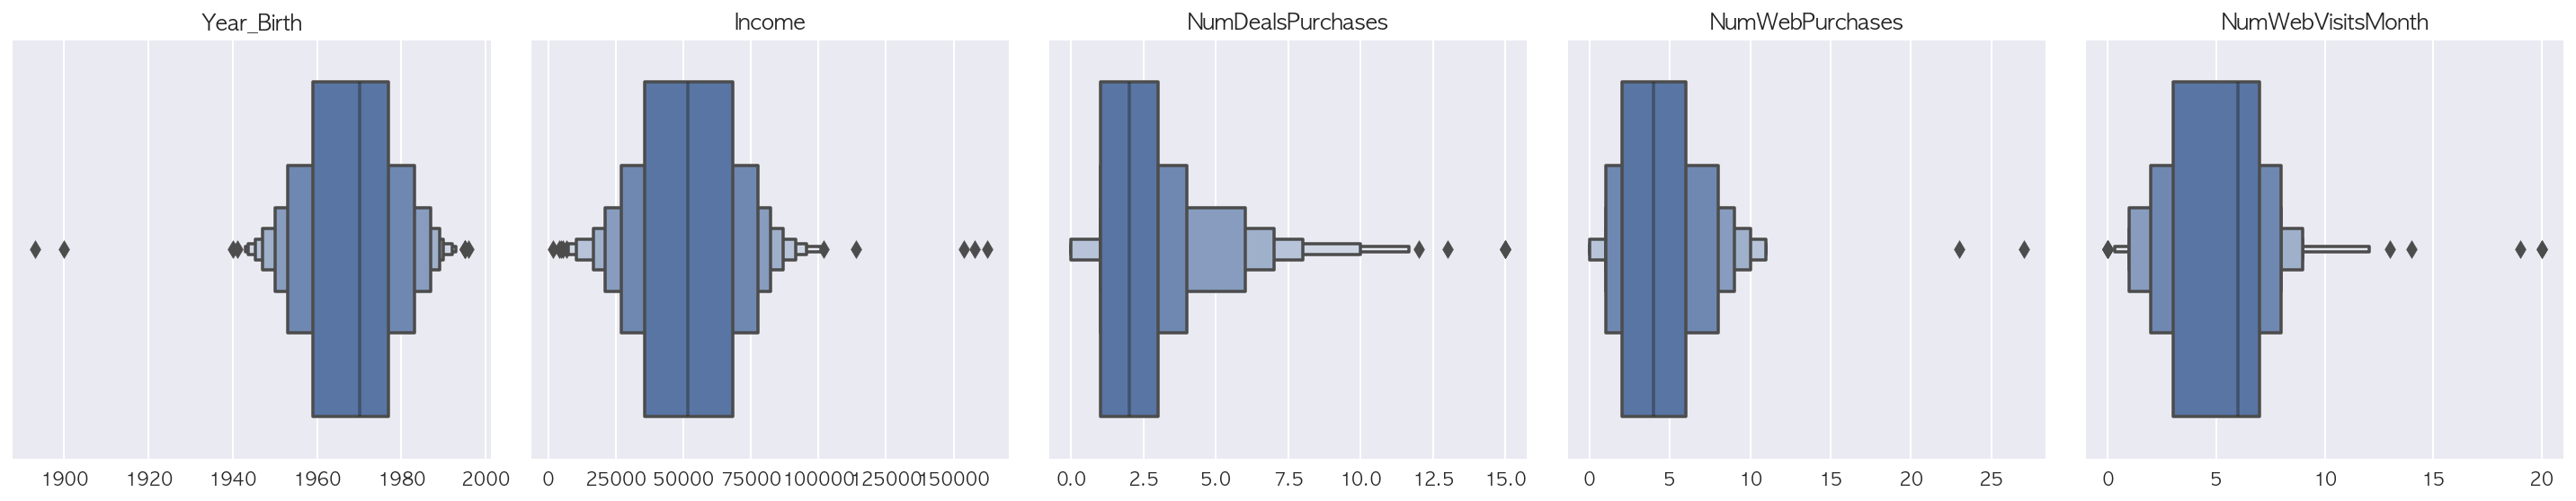

In [6]:
outlier_features = ['Year_Birth','Income','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']

fig, ax = plt.subplots(1, 5, figsize=(20,4))
for i, feature in enumerate(outlier_features):
    sns.boxenplot(ax=ax[i], data=train, x=feature)
    ax[i].set(title=f'{feature}', xlabel=None)

plt.tight_layout()
plt.show()

In [7]:
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound

def IQRsum(column):
    lower_bound, upper_bound = IQR(column)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = train[outlier_features].apply(lambda column: IQR(column))
outliers = outliers.append(train[outlier_features].apply(lambda column: IQRsum(column)), ignore_index=True)
outliers.index = ['lower','upper','sum']
print('Range of outliers by method')
outliers

Range of outliers by method


,Year_Birth,Income,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth
lower,1932.0,-13066.25,-2.0,-4.0,-3.0
upper,2004.0,117159.75,6.0,12.0,13.0
sum,2.0,3.00,46.0,2.0,4.0


NumDealsPurchases의 이상치 개수가 46개로 많이 발생한 것을 알 수 있습니다.

In [139]:
train[train['Year_Birth'] < 1927]

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Year_Customer,Month_Customer,Day_Customer
760,760,1900,2n Cycle,Divorced,36640.0,1,0,99,1,2,...,0,0,0,0,1,0,65,2013,9,26
865,865,1893,2n Cycle,Single,60182.0,0,1,23,1,1,...,0,0,0,0,0,0,22,2014,5,17


In [142]:
train[train['Income'] > 108841]

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Year_Customer,Month_Customer,Day_Customer
246,246,1976,PhD,Together,162397.0,1,1,31,0,0,...,0,0,0,0,0,0,107,2013,6,3
686,686,1975,Graduation,Divorced,153924.0,0,0,81,0,0,...,0,0,0,0,0,0,6,2014,2,7
730,730,1971,Master,Together,157733.0,1,0,37,0,1,...,0,0,0,0,0,0,59,2013,6,4
892,892,1945,PhD,Single,113734.0,0,0,9,0,27,...,0,0,0,0,0,0,277,2014,5,28


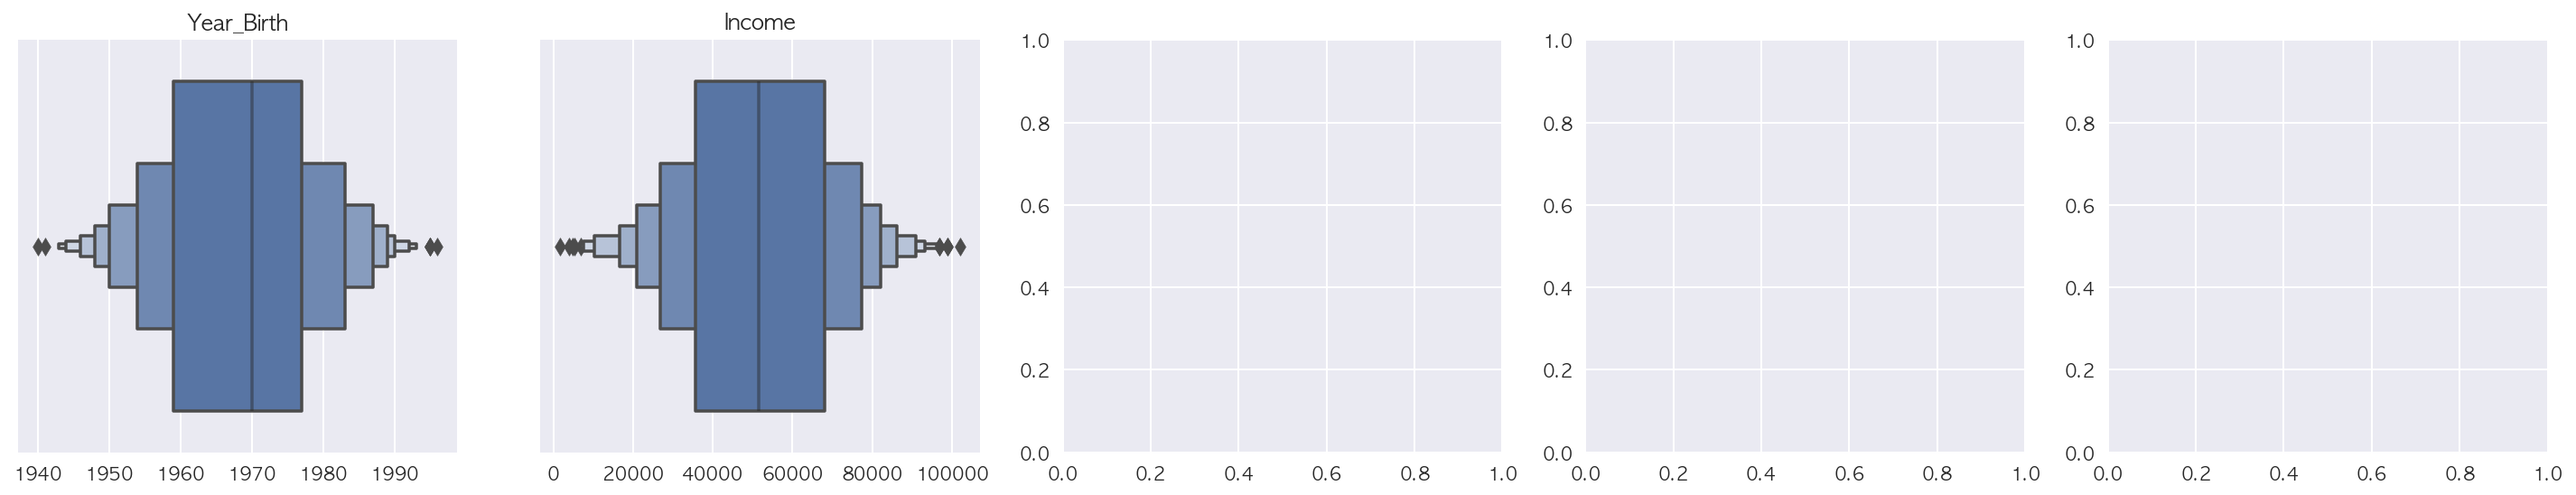

In [161]:
columns = ['Year_Birth','Income']

fig, ax = plt.subplots(1, 5, figsize=(20,4))
for (i, column), outlier in zip(enumerate(columns),[0,2]):
    cutted_data = pd.cut(train[column],bins=3,labels=[0,1,2])
    cutted_train = train[cutted_data != outlier]
    sns.boxenplot(ax=ax[i], data=cutted_train, x=column)
    ax[i].set(title=f'{column}', xlabel=None)

plt.tight_layout()
plt.show()

앞선 EDA에서 'Year_Birth'와 'Income'에 대한 3분위 중 가장 비중이 낮은 부분을 이상치로 판단하고 추출해보았습니다.   
'Income'의 경우 IQR에서 걸러지는 이상치보다 하나가 더 많이 발생했지만 그 수가 많지 않기에 학습 시 배제하는게 낫다고 판단했습니다.

In [15]:
columns = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
num_train = train[columns].apply(lambda column: IQR(column))
num_train = num_train.append(train[columns].apply(lambda column: IQRsum(column)), ignore_index=True)
num_train.index = ['lower','upper','sum']
train[columns].describe().append(num_train[columns])

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000
mean,2.33935,4.184116,2.690433,5.905235,5.348375
std,1.94328,2.810556,2.792236,3.306812,2.405115
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,2.000000,0.000000,3.000000,3.000000
50%,2.00000,4.000000,2.000000,5.000000,6.000000
75%,3.00000,6.000000,4.000000,8.000000,7.000000
max,15.00000,27.000000,11.000000,13.000000,20.000000
lower,-2.00000,-4.000000,-6.000000,-4.500000,-3.000000
upper,6.00000,12.000000,10.000000,15.500000,13.000000


'NumPurchases' 열의 경우 이상치를 제거하기엔 그 수가 많은 편이기 때문에,   
처음엔 IQR 기준 상한선을 초과하는 값에 대해 상한값으로 대체하는 방안을 생각했습니다.

하지만, 이상치를 제거하는 경우, 이상치를 상한값으로 대체하는 경우, 이상치를 방치하는 경우에 대해 테스트했을 때,   
이상치를 방치하는 경우가 가장 나은 성능을 보였기 때문에 해당 이상치는 처리하지 않을 것입니다.